**DETECCIÓN TEMPRANA DE INCENDIOS**

**OBJETIVO:** desarrollar un sistema de inteligencia artificial capaz de analizar imágenes de satélite con el fin de identificar signos tempranos de fuegos forestales y predecir su comportamiento con el fin de facilitar una respuesta rápida y efectiva ante ellos.




# Preparación del entorno


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report

In [ ]:
import os
import shutil

# Ruta a la carpeta que contiene los datos
data_dir = '/content/drive/MyDrive/mejoras/test'

# Ruta de destino en tu Google Drive
ruta_destino = "/content/drive/My Drive/mejoras/test/"

# Copiar la estructura de la carpeta y sus archivos a Google Drive
shutil.copytree(data_dir, os.path.join(ruta_destino, "carpeta_subida"))


# Nombres de las subcarpetas
subfolders = ['nowildfire', 'wildfire']

# Listas para almacenar imágenes y etiquetas
images_data = []
labels = []

# Procesar cada subcarpeta
for subfolder in subfolders:
    subfolder_path = os.path.join(data_dir, subfolder)
    images = os.listdir(subfolder_path)
    for image_name in images:
        image_path = os.path.join(subfolder_path, image_name)
        try:
            img = Image.open(image_path).convert('RGB')
            img = img.resize((128, 128))
            img_array = np.array(img)
            images_data.append(img_array)
            labels.append(subfolder)
        except Exception as e:
            print(f"Error al procesar la imagen {image_path}: {e}")

# Convertir listas a arrays numpy y normalizar
images_data = np.array(images_data, dtype='float32') / 255.0
labels = np.array(labels)

# Codificar las etiquetas
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(images_data, labels_encoded, test_size=0.2, random_state=42)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/mejoras/test'

# Construcción del modelo


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
85/85 [==============================] - 10s 43ms/step - loss: 0.3452 - accuracy: 0.8484 - val_loss: 0.3177 - val_accuracy: 0.8588
Epoch 2/20
85/85 [==============================] - 2s 25ms/step - loss: 0.2328 - accuracy: 0.9099 - val_loss: 0.2654 - val_accuracy: 0.9015
Epoch 3/20
85/85 [==============================] - 2s 24ms/step - loss: 0.1884 - accuracy: 0.9316 - val_loss: 0.2180 - val_accuracy: 0.9029
Epoch 4/20
85/85 [==============================] - 2s 23ms/step - loss: 0.1567 - accuracy: 0.9437 - val_loss: 0.1554 - val_accuracy: 0.9353
Epoch 5/20
85/85 [==============================] - 2s 26ms/step - loss: 0.1635 - accuracy: 0.9419 - val_loss: 0.2478 - val_accuracy: 0.8985
Epoch 6/20
85/85 [==============================] - 2s 26ms/step - loss: 0.1616 - accuracy: 0.9371 - val_loss: 0.2368 - val_accuracy: 0.9206
Epoch 7/20
85/85 [==============================] - 2s 27ms/step - loss: 0.1381 - accuracy: 0.9511 - val_loss: 0.2309 - val_accuracy: 0.9206
Epoch 8/20
8

# Evaluación del modelo

In [ ]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Predicciones
predictions = model.predict(X_test)
predictions_classes = np.round(predictions).flatten()

# Informe de clasificación
print(classification_report(y_test, predictions_classes, target_names=encoder.classes_))


22/22 - 0s - loss: 0.3446 - accuracy: 0.9324 - 200ms/epoch - 9ms/step

Test accuracy: 0.9323529601097107
22/22 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

  nowildfire       0.93      0.94      0.94       372
    wildfire       0.93      0.92      0.92       308

    accuracy                           0.93       680
   macro avg       0.93      0.93      0.93       680
weighted avg       0.93      0.93      0.93       680



# Visualización del rendimiento

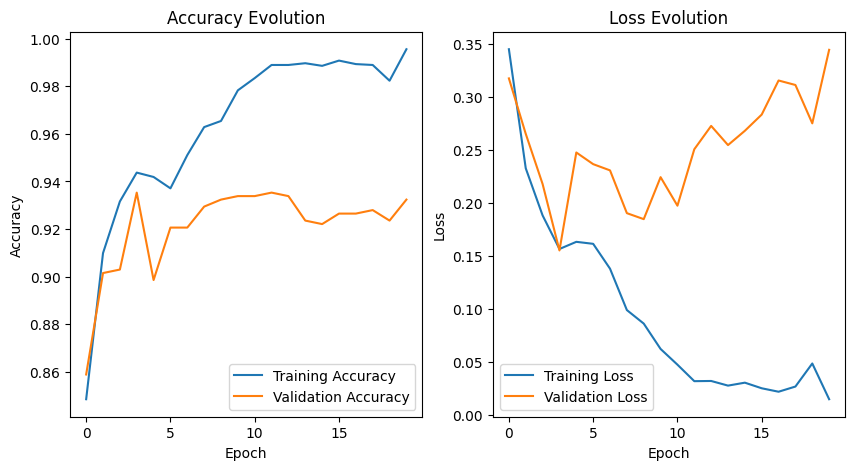

In [ ]:
plt.figure(figsize=(10, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Aumento de datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest')

# Este generador se usa durante el entrenamiento con model.fit_generator en lugar de model.fit

# Implementación de Callbacks

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callback para guardar el modelo con el mejor rendimiento en validación
checkpoint = ModelCheckpoint(
    'mejor_modelo.h5', save_best_only=True, monitor='val_loss', mode='min')

# Callback para detener el entrenamiento si no hay mejora en validación
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Incluir estos callbacks en el método fit
history = model.fit(
    X_train, y_train, epochs=20, validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stop])


Epoch 1/20
83/85 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9917

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - 3s 38ms/step - loss: 0.0233 - accuracy: 0.9919 - val_loss: 0.3022 - val_accuracy: 0.9250
Epoch 2/20
85/85 [==============================] - 2s 23ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.4287 - val_accuracy: 0.9265
Epoch 3/20
85/85 [==============================] - 2s 24ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.3967 - val_accuracy: 0.9235
Epoch 4/20
85/85 [==============================] - 2s 23ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.4001 - val_accuracy: 0.9294
Epoch 5/20
85/85 [==============================] - 2s 23ms/step - loss: 0.0043 - accuracy: 0.9982 - val_loss: 0.4906 - val_accuracy: 0.9235
Epoch 6/20
85/85 [==============================] - 2s 26ms/step - loss: 0.0333 - accuracy: 0.9886 - val_loss: 0.3421 - val_accuracy: 0.9235


# Evaluación Detallada del Modelo

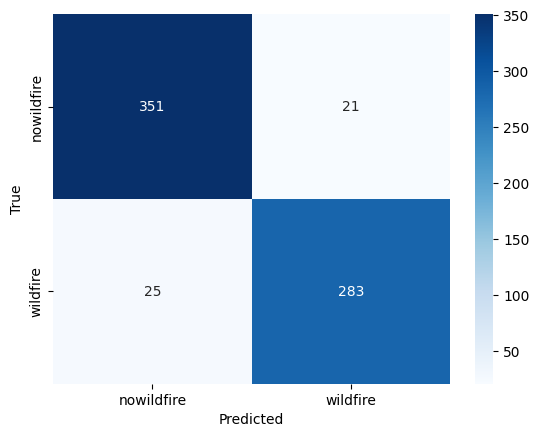

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions_classes)

# Visualización de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Demostración del Modelo

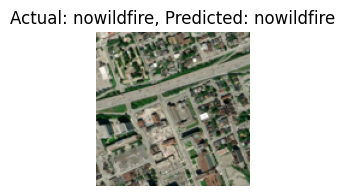

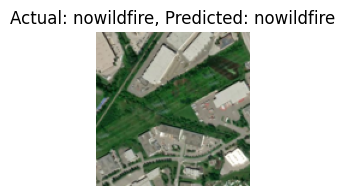

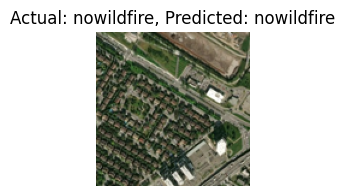

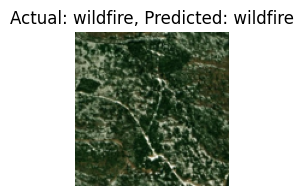

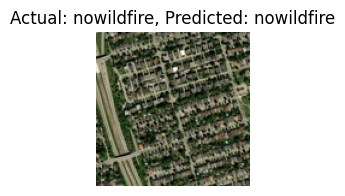

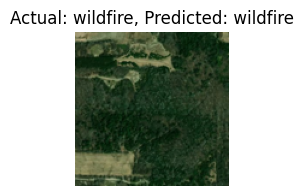

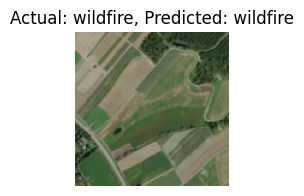

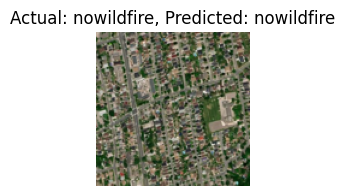

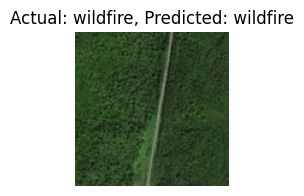

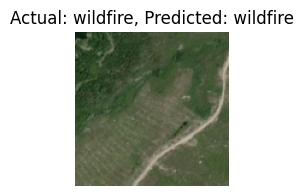

In [ ]:
import matplotlib.pyplot as plt

def mostrar_predicciones(X, y, predictions, n=10):
    indices = np.random.choice(range(len(X)), n, replace=False)
    for i in indices:
        img = X[i]
        actual = y[i]
        pred = predictions[i]
        plt.figure(figsize=(2, 2))
        plt.imshow(img)
        plt.title(f'Actual: {encoder.classes_[actual]}, Predicted: {encoder.classes_[int(pred)]}')
        plt.axis('off')
        plt.show()

# Llamada a la función para mostrar predicciones
mostrar_predicciones(X_test, y_test, predictions_classes)


1/1 [==============================] - 0s 22ms/step


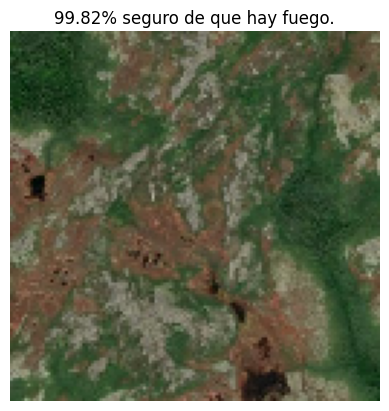

1/1 [==============================] - 0s 20ms/step


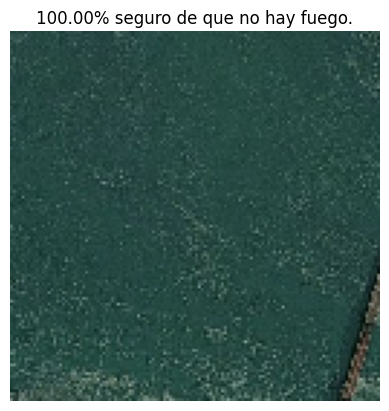

1/1 [==============================] - 0s 20ms/step


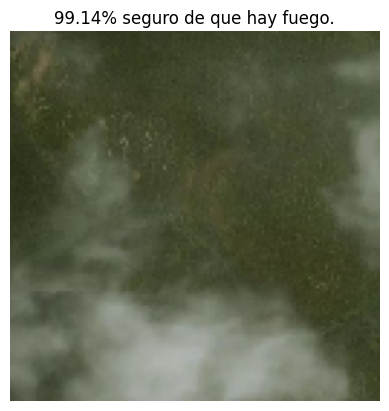

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_fire(image_path, model):
    """
    Función para predecir si hay fuego en una imagen.

    Parameters:
    - image_path: Ruta a la imagen que se va a predecir.
    - model: Modelo entrenado para predecir la presencia de fuego.

    Returns:
    - None: Solo muestra en pantalla la predicción.
    """
    # Cargar la imagen
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Realizar la predicción
    predictions = model.predict(img_array)

    # Mostrar la imagen
    plt.imshow(img)
    plt.axis('off')

    # Interpretar la predicción
    if predictions[0] > 0.5:
        plt.title(f"{predictions[0][0]*100:.2f}% seguro de que hay fuego.")
    else:
        plt.title(f"{(1-predictions[0][0])*100:.2f}% seguro de que no hay fuego.")
    plt.show()

# Ejemplo de uso
image_path = '/content/drive/MyDrive/mejoras/test/wildfire/-60.73875,50.24761.jpg'
predict_fire(image_path, model)

# Ejemplo 2 de uso
image_path = '/content/drive/MyDrive/mejoras/test/nowildfire/-73.6637,45.419342.jpg'
predict_fire(image_path, model)

# Ejemplo 3 de uso con humo
image_path = '/content/drive/MyDrive/mejoras/test/wildfire/-71.61443,50.43285.jpg'
predict_fire(image_path, model)